In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2091 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442860155.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.107596s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [2]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.097326s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [3]:
vm.testing_rmse(models, training_df)

{'downhill': 0.47539505410384431,
 'total': 0.36649403495072064,
 'uphill': 0.22069858785948213}

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.784169,-0.308623,0.362551
seg_distance,-0.193294,-0.102238,0.238303
seg_maximum_grade,-0.187313,-0.049048,0.161729
total_rating,1.000000,0.360039,-0.821658
uphill_rating,0.360039,1.000000,NaN
downhill_rating,-0.821658,NaN,1.000000


In [5]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
lb.get('athlete', athlete_ratings)

{'downhill_rating':       athlete_id  downhill_rating
 rank                             
 1         864611       100.000000
 2         738203        96.268115
 3         371689        96.057889
 4        2883756        92.966087
 5        1033201        92.473711
 6         506955        89.179950
 7          64344        88.071898
 8         249844        88.017317
 9         269654        87.520907
 10       1979656        87.324059
 11        123103        87.070271
 12        738400        85.707134
 13        397128        85.589965
 14        104544        85.275894
 15      10723002        85.022674
 16       5240724        84.933414
 17        344430        84.824157
 18        142540        84.607954
 19         28370        83.654047
 20         35943        83.489096,
 'total_rating':       athlete_id  total_rating
 rank                          
 1        8531353    100.000000
 2         259304     96.415479
 3        3282892     91.793862
 4           5165     90.320786
 5

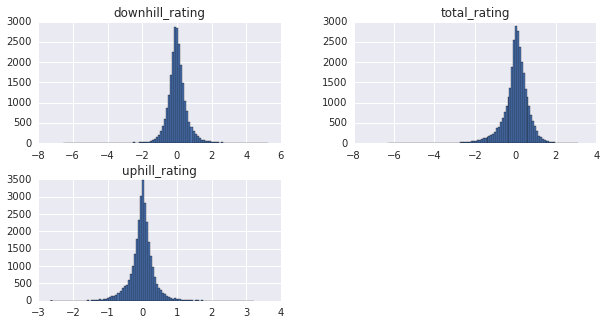

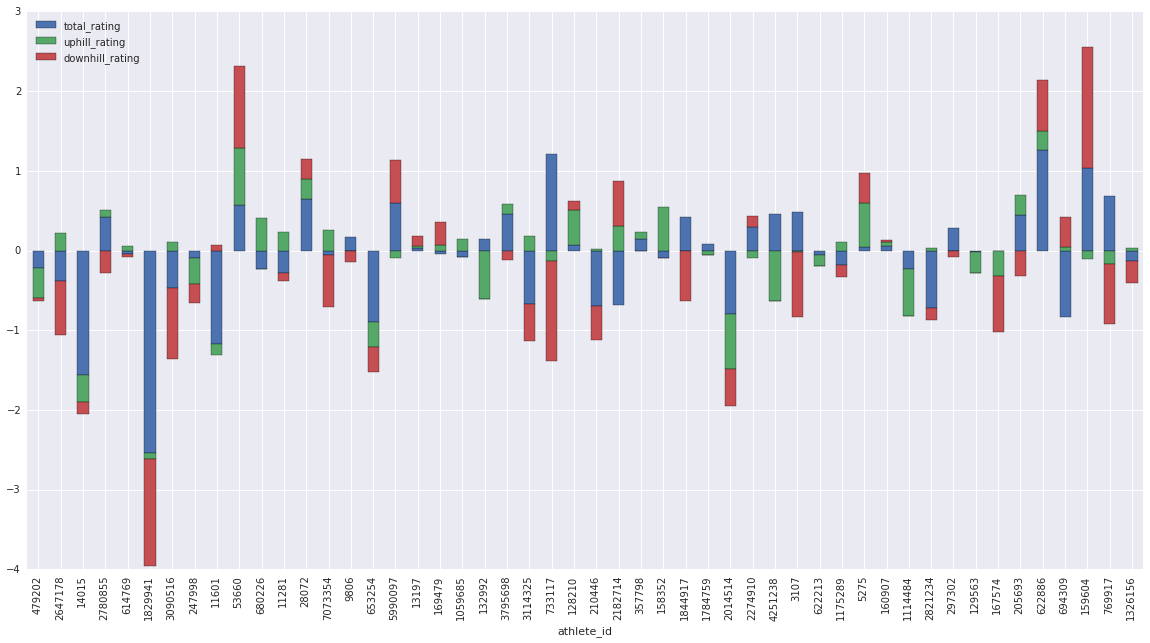

In [6]:
vm.plot_ratings(athlete_ratings)

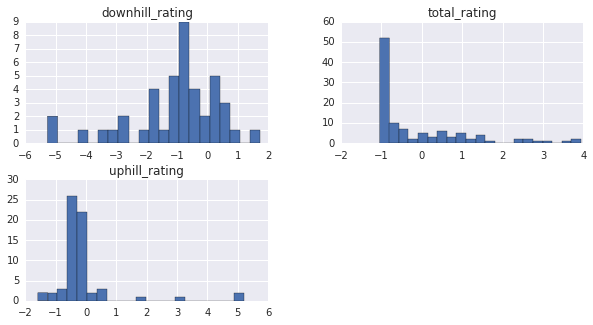

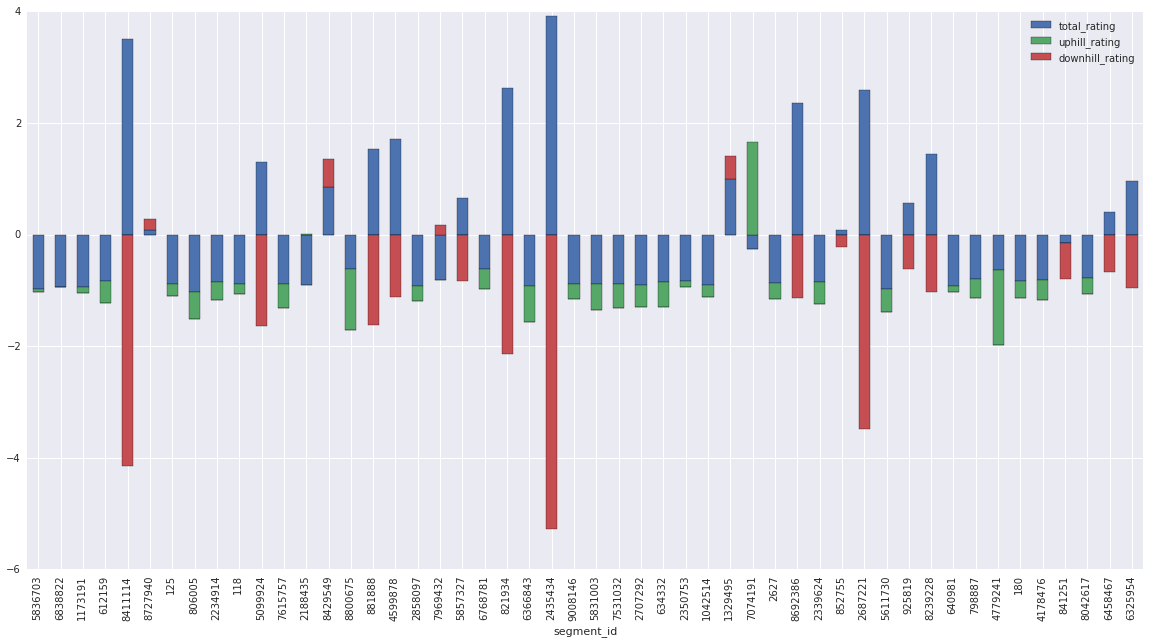

In [7]:
vm.plot_ratings(segment_ratings)

In [14]:
df.query('athlete_id == 597745')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,...,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed,average_speed_ath_mean,average_speed_seg_mean,average_speed_seg_std,predicted_speed
1130947,28.1,False,633.6,194,62,597745,6135256,314427693,-8.8,596.3,...,-0.1,2015-05-29 15:59:02,False,False,-37.3,3.265979,7.70721,13.363437,1.850717,10.535323
1191718,254.8,False,804.4,263,263,597745,5292307,314427693,6.4,787.8,...,14.8,2015-05-29 14:34:27,False,False,-16.6,3.058555,7.70721,3.561428,0.684850,5.634319
1791929,233.0,False,4070.8,343,343,597745,4259807,314427693,-3.8,4039.5,...,39.3,2015-05-29 15:49:13,False,False,-31.3,11.868222,7.70721,10.819698,1.357627,9.263454
1898803,166.3,False,2451.4,194,194,597745,8429549,314427693,-6.2,2400.5,...,2.3,2015-05-29 15:48:56,False,False,-50.9,12.636082,7.70721,12.224926,1.612971,9.966068


In [9]:
df.query('segment_id == 7074191 & average_speed < 2.2')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,...,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed,average_speed_ath_mean,average_speed_seg_mean,average_speed_seg_std,predicted_speed
1370894,92.5,False,195.5,381,51,30309,7074191,1898981,4.7,183.4,...,8.6,2006-04-27 10:08:47,False,False,-12.1,0.513123,4.666949,4.706536,1.429934,4.686743
1371023,164.5,False,178.7,90,90,10629,7074191,277207,4.7,183.4,...,8.6,2011-01-03 15:34:00,False,False,4.7,1.985556,6.977032,4.706536,1.429934,5.841784
1371079,97.3,False,186.1,148,70,63598,7074191,3142324,4.7,183.4,...,8.6,2011-03-27 15:32:44,False,False,-2.7,1.257432,3.785482,4.706536,1.429934,4.246009
1371152,190.0,False,196.0,133,85,99346,7074191,816222,4.7,183.4,...,8.6,2011-06-26 12:21:22,False,False,-12.6,1.473684,3.350463,4.706536,1.429934,4.028499
1371230,80.7,False,170.0,82,82,842379,7074191,15062285,4.7,183.4,...,8.6,2011-09-04 13:56:54,False,False,13.4,2.073171,1.525212,4.706536,1.429934,3.115874
1371341,NaN,False,199.1,97,76,761401,7074191,13262558,4.7,183.4,...,8.6,2011-11-12 11:33:20,False,False,-15.7,2.052577,4.784655,4.706536,1.429934,4.745596
1371384,NaN,False,173.0,209,63,1273184,7074191,26147313,4.7,183.4,...,8.6,2011-12-03 16:04:37,False,False,10.4,0.827751,2.596165,4.706536,1.429934,3.651350
1371426,NaN,False,196.1,94,42,133299,7074191,2761678,4.7,183.4,...,8.6,2011-12-18 10:15:31,False,False,-12.7,2.086170,3.452186,4.706536,1.429934,4.079361
1371460,38.3,False,181.7,151,78,181092,7074191,2934475,4.7,183.4,...,8.6,2011-12-28 11:49:25,False,False,1.7,1.203311,2.444549,4.706536,1.429934,3.575543
1371498,120.0,False,193.8,124,86,9262,7074191,3188361,4.7,183.4,...,8.6,2012-01-07 14:12:32,False,False,-10.4,1.562903,4.032039,4.706536,1.429934,4.369287


In [13]:
athlete_ratings.downhill_rating.idxmin()

597745

In [11]:
df.shape

(1939767, 22)

In [15]:
1.850717 *4

7.402868